# Spectral clustering / embedding

Author: Matt Smart

[Overview](#linkOverview)  
[Graph Theory](##linkGraph)   
[Algorithm](#linkAlgorithm)  
[Example 1: Simple graph clusters](#linkExample1)  
[Example 2: ???](#linkExample2)  
[Resources](#linkResources)  

### Overview <a id='linkOverview'></a>
- non-linear dimension reduction technique
- rough idea: Find structure in data from the eigendecomposition of the Laplacian of the data's distance matrix
    - Step 1: Construct graph Laplacian from the pairwise distances between data points
    - Step 2: Find eigendecomposition of the Laplacian
    - Step 3: Use eigendecomposition to find a low dimension embedding of the data or clusters
- can be thought of as the "vanilla version" of related techniques such as diffusion map and umap

### Some minimal graph theory <a id='linkGraph'></a>

#### Graphs
Graphs are denoted by $G=(V,E)$  
- $V$ or $V(G)$ denotes the "vertices" or "nodes"  
- $E$ or $E(G)$ denotes the "edges"  

#### Graph properties
- **_adjacent vertices_**: directly connected by an edge
- **_edge weights_**: edges may or may not have "weights" associated with them, giving a notion of connection strength
- **_connected graph_**: there exists path between any two nodes $i$ and $j$
- **_weighted graph_**: unweighted graphs have all edge weights constant (or $1$), weighted graphs are any deviation from this
- **_undirected graph_**: all edge weights are symmetric
- **_directed graph_**: one or more edge weights are assymmetric
- **_degree of a node_**: $d(j) = \sum_{i} w_{ij} $

#### Matriices that characterize a graph
- $A$ - **_adjacency matrix_**: $a_{ij}=1$ if nodes are adjacent, $0$ otherwise (note $a_{ii}=0$)
- $W$ - **_weight matrix_**: a scaled (i.e. non-boolean) version of the adjacency matrix; typically restrict weights $w_{ij}\geq 0$
- $D$ - **_degree matrix_**: diagonal matrix of degrees of each node; $d_{jj}=\sum_i w_{ij}$
- $L$ - **_graph laplacian_**: $L=D-A$ for unweighted graphs, or $L=D-W$ for weighted graphs

$L$ is a useful construction to store and infer graph properties

#### Basic proprties of graph laplacian
- off-diagonals are non-positive (if we constrain the weights to be non-negative); diagonals are non-negative
- columns of $L$ sum to zero
- $L$ is positive semi-definite
- the smallest eigenvalue is $\lambda_1=0$, with corresponding eigenvector a "steady state" of the graph (more below)
- algebraic multiplicity of $\lambda_1=0$ corresponds to the number of subgraphs (multiplicity one means $G$ is connected)
- $L$ has $p$ non-negative, real eigenvalues $0=\lambda_1\leq\lambda_2\leq\ldots\leq\lambda_p$

#### Connection to general stochastic processes

- interpret $L$ as generator of dynamics between the nodes of the graph
- $v(t)$ describes the state of the graph as real values at each node
- consider dynamics: $\dot v = -Lv$
- trajectories: $v(t)=e^{-Lt}v_0$
- these dynamics preserve $\sum_i v_i$
- probability flow: $-L_{ij}$ describes the infinitesimal transition rate of probability (or heat, water.. etc) from node $j$ to node $i$

#### Why is it called "Laplacian"?
- recall the heat equation $\frac{\partial u}{\partial t}=\nabla^2 u$
- $L$ is the discrete version of the continuous laplacian operator $\nabla^2$
- suppose space were note continuous but discrete (e.g. mesh of $p$ connected nodes), then $\dot u = -Lu$ would describe heat flow on the mesh

#### For our purposes
- we will assume connected graph and make sure any constructions satisfy this
- nodes of the graph are in 1-1 correspondence with our data points/samples
- edges describe some relationship between data samples (e.g. proximity)

### Algorithm <a id='linkAlgorithm'></a>

#### Setup / input
- suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- store the data samples columnwise as $X\in\mathbb{R}^{N\,\times\,p}$

#### Step 1: Distance matrix -> Similarity matrix  -> Graph Laplacian

**_Pairwise distances_**: Choose a metric $d(\cdot, \cdot)$.
- often one uses Euclidean distance if data is continuous samples from $\mathbb{R}^N$
- other distances may be more appropriate (e.g. 1-norm if data is binarized)

**_Similarity matrix_**: Crudely, make them inversely proportional to the distances. Goal is to store local relationships between the datapoints.  
Example choices:
- $s_{ij}=\frac{1}{d_{ij}^2}$  
- $s_{ij}(\sigma)=exp(-d_{ij}^2\,/\, 2\sigma)$  
- alternatively, it could correspond to a qualitative ordering / ranking of similarities

**_Laplacian construction_**: Need to make some choices to build something resembling $L=D-S$.  
First construct diagonal degree matrix $D$ by summing the columns of similarity matrix $S$: $\:\:d_{jj} = \sum_i s_{ij} $.  
Possible Laplacian choices (some are outlined in von Luxburg, 2007): 
1. $L=D-S\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$ (standard, unnormalized)
2. $L=I-D^{-1}S\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:$  (normalized)
3. $L=I-D^{-1/2}SD^{-1/2}\:\:\:\:\:\:$ (normalized, symmetrized)


#### Step 2: Find eigendecomposition of the Laplacian
...
Reminder or note about structure of L constrains eigenstructure: least eigenvalue is...


#### Step 3: Use eigendecomposition to find a low dimension embedding of the data or clusters
...


...  
...  
...  OLD MDS BELOW

Optimization:
- solve $Y^\ast=\operatorname*{arg\,min}_Y f(W,X,Y)$ by "stress majorization" (see https://en.wikipedia.org/wiki/Stress_majorization)
- can show procedure monotonically decreases cost function (i.e. finds local minima)
- repeat for multiple initial conditions $Y^{(0)}$, choose best local minima
- note many local minima, $\{Y_{candidate}\}$, each invariant under translation/reflection/rotation

Output:
- locally optimal embedding (k-dim representation) $Y\in\mathbb{R}^{k\,\times\,p}$

Runtime:
- MDS $\approx O\left(p^3\right)$  (where $p$ is the number of $\mathbb{R}^N$ data points)
- compare vs. e.g. PCA $\approx O(p^2)$

Note:
- one way to choose $k$ is to run MDS for multiple $k$, plot $f(W,X,Y^\ast)$ vs. $k$
- look for an "elbow" in the plot -- this implies "good bang for your buck"

### Example 1: Basic idea to identify graph clusters <a id='linkExample1'></a>

X data samples shape: (1000, 2)
Y data labels shape: (1000,)


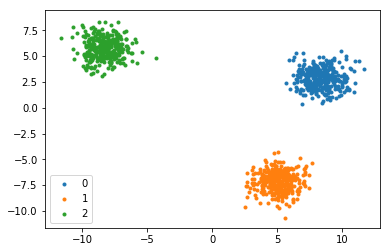

In [37]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances

p = 1000   # num samples
n = 2      # original dimension R^n
k = 3      # number clusters

# generate some blob data in 2D
X, Y = make_blobs(n_samples=p, centers=k, n_features=n, random_state=77)
print("X data samples shape:", X.shape)
print("Y data labels shape:", Y.shape)

# visualize data in R^n
for label in set(Y):
    mask = Y==label
    plt.scatter(X[:,0][mask], X[:,1][mask], marker = '.', label = label)   #, color =  label + 1) #, label = str(label))
plt.legend()
plt.show()

In [38]:
# compute data distances
D = pairwise_distances(X, metric='euclidean')

# convert to similarity matrix
S = ...

# construct graph laplacian L = D - S
W = np.diag(np.sum(S))
L = np.eye()

ValueError: Input must be 1- or 2-d.

### Example 2: ???? <a id='linkExample2'></a>

### Resources <a id='linkResources'></a>
- On Spectral Clustering - analysis and algorithm (Ng, 2002, NIPS)
- A Tutorial on Spectral Clustering (von Luxburg, 2007)
- REVIEW Community detection in graphs (Fortunato, 2010, arxiv)
- Detecting communities in large networks (Cappoci, 2005, PhysicaA)